Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_test/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2265
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11265 files belonging to 9 classes.
Using 9012 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11265 files belonging to 9 classes.
Using 2253 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt
import cv2
from skimage import io
import glob
import random

In [ ]:
# path to your dataset
DATASET_PATH = '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train'

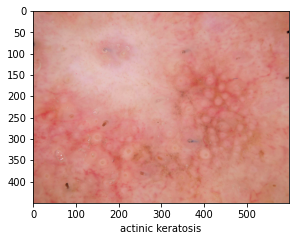

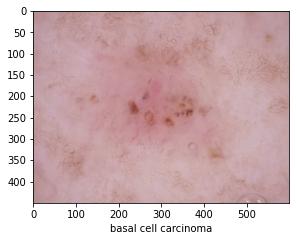

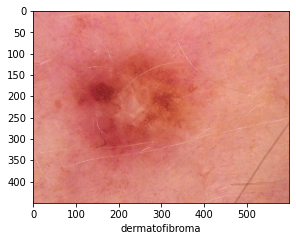

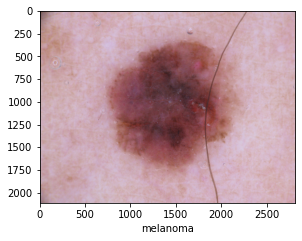

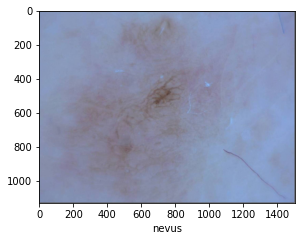

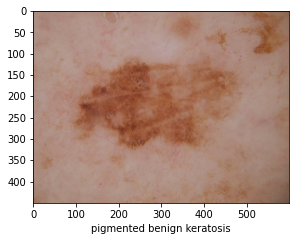

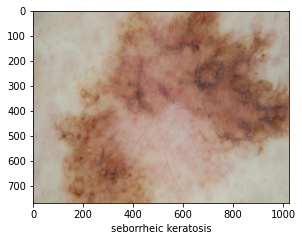

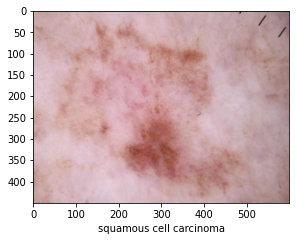

In [ ]:
for i in range(0,8):
  plt.figure(figsize=(20, 12))
  plt.subplot(3,3,i+1)
  disease_path = os.path.join(DATASET_PATH, class_names[i], '*')
  disease_path = glob.glob(disease_path)
  image = io.imread(disease_path[random.randint(0,10)])
  plt.imshow(image)
  plt.xlabel(class_names[i])
  plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

# Model M1

In [ ]:
num_class = 9
model = Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 180, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 180, 180, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


**We can see that the training accuracy is high (> 90%) but the validation accuracy is low (less than 80%). Clearly, the model has overfitted. Hence we need to regularize the model**

> Indented block



### Visualizing training results

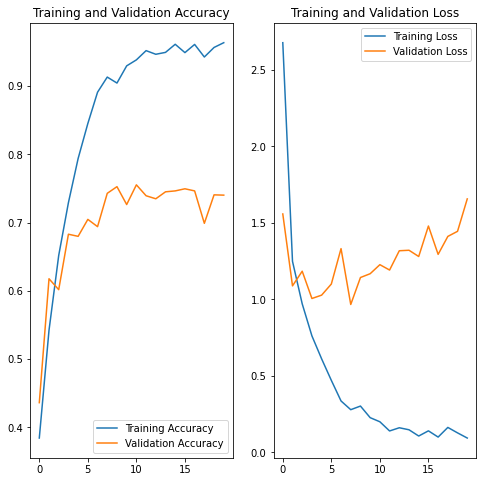

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The gap between training and validation accuracy seems to increase after 4 or 5 epochs indicating overfitting.

**We need to further improve the train data through augmentation or reducing class imbalance and tune the model**

# Data Augmentation layer

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
data_augmentation

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
#for img in train_ds.take(1):
   # aug_img = data_augmentation(img)

### Todo:
### Create the model, compile and train the model


# Model M2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## https://www.tensorflow.org/tutorials/images/data_augmentation
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip
## Your code goes here


model = Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

### Compiling the model

In [ ]:
## Your code goes here

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 180, 180, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 180, 180, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 180, 180, 64)     

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


### Visualizing the results

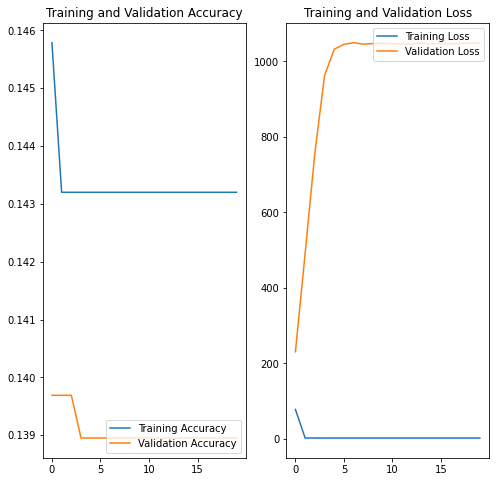

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# glob('./Skin cancer ISIC The International Skin Imaging Collaboration/train/*/*')
# './Skin cancer ISIC The International Skin Imaging Collaboration/train\\actinic keratosis\\ISIC_0025780.jpg'

### After including Dropout the model seems to have lesser gap between training and validation accuracy and improving loss.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

## Class Imbalance

In [ ]:
## Your code goes here.
## original_df - > path_list, lesion_list
for i in class_names :
  image_count_train = len(list(data_dir_train.glob(i+'*/*.jpg')))
  print(i,image_count_train)

actinic keratosis 114
basal cell carcinoma 384
dermatofibroma 95
melanoma 450
nevus 361
pigmented benign keratosis 464
seborrheic keratosis 77
squamous cell carcinoma 181
vascular lesion 139


**Class Imbalance**
#### - seborrheic keratosis has the least number of samples - 77
#### - pigmented benign keratosis (464 samples), melanoma  (450 samples) dominate the data in terms proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


# Augmentor Library layer code

In [ ]:

!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_training_dataset='/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.4)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCBC0AFF7D0>: 100%|██████████| 500/500 [00:19<00:00, 25.29 Samples/s]


Initialised with 384 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCD62712B50>: 100%|██████████| 500/500 [00:21<00:00, 23.38 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCCC2EB8E10>: 100%|██████████| 500/500 [00:18<00:00, 26.76 Samples/s]


Initialised with 450 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCD69E338D0>: 100%|██████████| 500/500 [01:24<00:00,  5.90 Samples/s]


Initialised with 361 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FCCC2732890>: 100%|██████████| 500/500 [01:21<00:00,  6.14 Samples/s]


Initialised with 464 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCD644CA590>: 100%|██████████| 500/500 [00:19<00:00, 25.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCBC0A3CED0>: 100%|██████████| 500/500 [00:41<00:00, 12.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCBC08EC6D0>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCBC1796C10>: 100%|██████████| 500/500 [00:18<00:00, 26.91 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


Let's see the distribution of augmented data after adding new images to the original training data.

In [ ]:
os.path.join(data_dir_train, '*','output','*.jpg')

'/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/*/output/*.jpg'

In [ ]:
path_list_new = [x for x in glob.iglob(os.path.join(data_dir_train, '*','output','*.jpg'))]

['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027648.jpg_dfc7e0ce-4bde-4f94-bdac-a48e3ad8d27d.jpg',
 '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033780.jpg_bab0bad4-e452-4a65-a61a-676a6faf45be.jpg',
 '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0028790.jpg_d11d6acd-50fd-4e4a-9f03-f9a626f7e239.jpg',
 '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030321.jpg_c0d9e99a-a4f5-434c-8d09-c474102d9aa7.jpg',
 '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0028926.jpg_15587680-9ed2-484c-a288-0afabe532575.jpg',
 '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output/dermatofibroma_original_ISIC_00338

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.iglob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
original_df=[['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/actinic keratosis'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/basal cell carcinoma'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/melanoma'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/nevus'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/pigmented benign keratosis'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/seborrheic keratosis'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/squamous cell carcinoma'],
             ['/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/vascular lesion']]
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

TypeError: ignored

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

# Model M3

In [ ]:
## your code goes here

model = Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Class Imbalance has been addressed by increasing no of images in every class. Normalization and increasing feature maps clearly helps with regularization and shows overall improvement in performance.